# ТЕРВЕРЧИК, 21 варик))) 

In [2]:
import matplotlib.pyplot as plt
from statistics import median
from random import random
import pandas as pd
import numpy as np
import math
%matplotlib inline
plt.style.use('seaborn')

C:\Users\avdule\AppData\Local\Temp\ipykernel_7756\3211259652.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def model():
    x = 0
    while True:
        sv = random()
        x += 1
        if sv < p:
            break
    return x


def get_mo(p, lst):
    E, E2 = 0, 0
    for el in lst:
        E += p * el
    for el in lst:
        E2 += p * (el ** 2)
    return E, E2


def get_sample_mean(n, lst):
    return (1/n) * sum(lst)


def get_sample_variance(n, lst, x):
    res = 0
    for el in lst:
        res += (el - x) ** 2
    return (1/n)*res


def get_median(n, lst):
    if n % 2 == 1:
        return lst[len(lst)//2+1]
    return lst[len(lst)//2]

def sum_raspr(i, y_lst, y_values):
    return sum([y_values[j] for j in range(len(y_lst)) if y_lst[j] <= i])

def get_q(interval, y_lst, p):
    q = 0
    for i in range(len(y_lst)):
        if y_lst[i] >= interval[0] and y_lst[i] < interval[1]:
            q += p[i]
    return q

def get_nj(interval, y_lst, y_values):
    nj = 0
    for i in range(len(y_lst)):
        if y_lst[i] >= interval[0] and y_lst[i] < interval[1]:
            nj += y_values[i]
    return nj

def get_y_dict(n):
    y_dict = dict()

    for i in range(n):
        x = model()
        if x not in y_dict.keys():
            y_dict[x] = 1
        else:
            y_dict[x] += 1
    return y_dict

def get_y(n):
    y_dict = get_y_dict(n)
    y_lst = sorted(y_dict.keys())
    y_values = [y_dict[y_lst[i]] for i in range(len(y_lst))]
    return y_dict, y_lst, y_values

In [3]:
p = float(input("\nВведите вероятность\n"))
n = int(input("\nВведите количество экспериментов\n"))
y_dict, y_lst, y_values = get_y(n)

In [4]:
data = []
for i in range(len(y_lst)):
    data.append([y_lst[i], y_values[i], y_values[i]/n])
df = pd.DataFrame(data, columns=['Yi', 'Ni', 'Ni/N'])
df.to_csv('first.csv', index=False, sep=',', encoding='utf-8')

In [5]:
E = 1/p
sample = []
for i in range(len(y_lst)):
    sample += [y_lst[i]] * y_values[i]

sample_mean = get_sample_mean(n, sample)
sample_variance = get_sample_variance(n, sample, sample_mean)
median = median(sample)
R = y_lst[-1] - y_lst[0]
D = (1-p)/(p**2)

In [6]:
data = [[E, sample_mean, abs(E-sample_mean), D, sample_variance, abs(D-sample_variance), median, R]]
col = ['E', 'sample_mean', '|E-sample_mean|', 'D', 'S^2', '|D-S^2|', 'Me', 'R']
df = pd.DataFrame(data, columns=col)
df.to_csv('second_1.csv', index=False, sep=',', encoding='utf-8')

In [7]:
EPS = 0.999
y = []
j = 0
F = []
Fn = []
while True:
    y.append(j)
    val_t = 1-(1-p) ** j
    val_v = sum_raspr(j, y_lst, y_values)/n
    F.append(val_t)
    Fn.append(val_v)
    if val_t >= EPS and val_v >= EPS:
        break
    j += 1

Text(0.5, 1.0, 'График меры расхождения функций распределения')

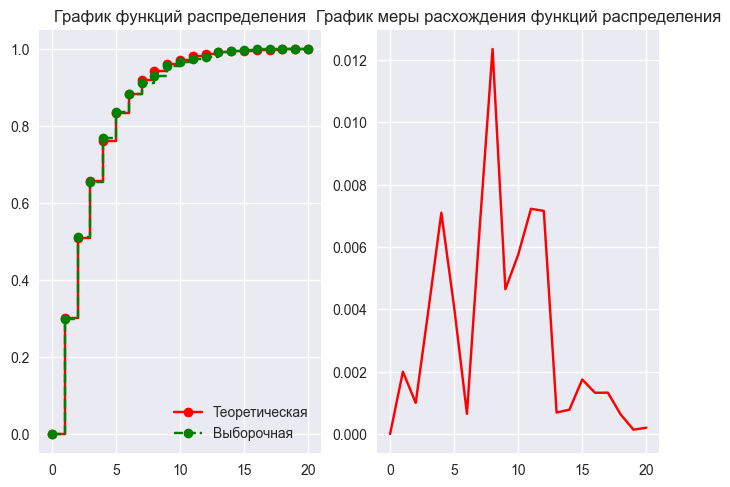

In [8]:
plt.subplot(1, 2, 1)
plt.step(y, F, "r-o", where="post", label="Теоретическая")
plt.step(y, Fn, "g--o", where="post", label="Выборочная")

plt.title("График функций распределения")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(y, [abs(F[i]-Fn[i]) for i in range(len(F))], 'r-')
plt.title("График меры расхождения функций распределения")

In [9]:
data = []
deviation = []
P_lst = []
for i in range(len(y_lst)):
    P = (1-p) ** (y_lst[i]-1) * p
    P_lst.append(P)
    deviation.append(abs(P-y_values[i]/n))
    data.append([y_lst[i], P, y_values[i]/n, deviation[-1]])
df = pd.DataFrame(data, columns=['Yi', 'Pi', 'Ni/N', 'Deviation'])
df.to_csv('second_2.csv', index=False, sep=',', encoding='utf-8')

f"Максимальное отклонение = {max(deviation)}"

'Максимальное отклонение = 0.011100000000000027'

In [44]:
k = int(input("Введите количество точек"))
z = [float("-inf")]
for i in range(k):
    z.append(float(input(f"Введите Z{i+1}")))
z.append(float("inf"))

In [47]:
def get_R0(y_lst, y_values, z, n, p):
    P_lst = []
    for i in range(len(y_lst)):
        P = p * ((1 - p) ** (y_lst[i] - 1))
        P_lst.append(P)
    q = []
    n_lst = []
    for i in range(len(z)-1):
        q.append(get_q((z[i], z[i+1]), y_lst, P_lst))
        n_lst.append(get_nj((z[i], z[i+1]), y_lst, y_values))
    R0 = 0
    for j in range(len(q)):
        try:
            R0 += ((n_lst[j] - n*q[j]) ** 2) / (n*q[j])
        except ZeroDivisionError:
            pass
    return R0

R0_lst = []
for i in range(100):
    y_dict, y_lst, y_values = get_y(n)
    R0_lst.append(get_R0(y_lst, y_values, z, n, p))

def hypothesis(p):
    alpha = float(input("Введите уровень значимости альфа"))
    def get_integr(a, b):
        r = k
        def func(z):
            try:
                return (z**(0.5*r-1)).real * math.exp(-0.5*z) * (math.gamma(0.5*r) ** (-1)) * (2 ** (-0.5*r))
            except ZeroDivisionError:
                return 0
        razb = 1000
        res = sum([(func(a+(b-a)*((k-1)/razb)) + func(a+(b-a)*(k/razb)))*((b-a)/(2*razb)) for k in range(razb)])
        return res
    f = [get_integr(0, el) for el in R0_lst]
    reject = [0 for j in f if j.real >= 1 - alpha]
    accept = [1 for j in f if j.real < 1 - alpha]

    print(f"Количество отвергнутых гипотез Н0 о геометрическом распределении = {len(reject)}")
    print(f"Количество принятых гипотез Н0 о геометрическом распределении = {len(accept)}\n")

for i in range(3):
    hypothesis(p)

Количество отвергнутых гипотез Н0 о геометрическом распределении = 54
Количество принятых гипотез Н0 о геометрическом распределении = 46

Количество отвергнутых гипотез Н0 о геометрическом распределении = 11
Количество принятых гипотез Н0 о геометрическом распределении = 89

Количество отвергнутых гипотез Н0 о геометрическом распределении = 5
Количество принятых гипотез Н0 о геометрическом распределении = 95

